In [1]:
# Name: Homework #3 -- ECGR 4105
# Purpose: Classification Methods
# Author: Tim Johnson, Electrical Engineering Major, UNCC
# Date Created: November 1, 2021

In [2]:
# Import needed libraries
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd 
from sklearn.datasets import load_breast_cancer

In [3]:
# Create variable for data storage
cancer = load_breast_cancer()
cancer_data = cancer.data

# Find shape
cancer_data.shape 

(569, 30)

In [4]:
# Format and output dataset
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Make a dependent variable for cancer outcome/label
cancer_labels = cancer.target

# Add cancer_labels column to dataset
labels = np.reshape(cancer_labels, (569, 1))
final_cancer_data = np.concatenate([cancer_data, labels], axis = 1)
cancer_dataset = pd.DataFrame(final_cancer_data)

In [6]:
# List the names of all the features
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Add features and labels into matrix  
features_labels = np.append(features, 'label')

In [8]:
# Add the labels to the dataset format
cancer_dataset.columns = features_labels
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
#########################################################################################################
# PROBLEM 1 -- SVC with PCA for breast cancer data

# Split dataset into independent and dependent variables
x = cancer_dataset.iloc[:, 0:29].values
y = cancer_dataset.iloc[:, 30].values

# Split data into 80% training and 20% evaluation
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)

# Feature scale and standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Perform PCA analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)


In [11]:
#Best number for n
pca.n_components_

2

Text(0, 0.5, 'Second Principal Component')

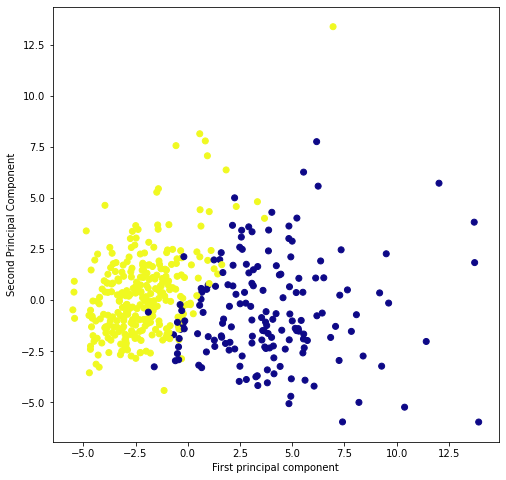

In [12]:
plot.figure(figsize=(8,8))
plot.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='plasma')
plot.xlabel('First principal component')
plot.ylabel('Second Principal Component')

In [13]:
# "Linear Support vector classifier" 
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10) 
model.fit(x_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [14]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [15]:
# Compute accuracy for problem 1
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9285714285714286
Recall: 0.9848484848484849


In [16]:
model = SVC(kernel='poly', C=1E10) 
model.fit(x_train, y_train)

SVC(C=10000000000.0, kernel='poly')

In [17]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [18]:
# Compute accuracy for problem 1
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9122807017543859
Precision: 0.868421052631579
Recall: 1.0


In [ ]:
model = SVC(kernel='rbf', C=1E10) 
model.fit(x_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [ ]:
# Compute accuracy for problem 1
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))